Epoch 0, Loss: 0.24974190053794793
Epoch 1, Loss: 0.05904825504617358
Epoch 2, Loss: 0.02331818847495504
Epoch 3, Loss: 0.011915367492471384
Epoch 4, Loss: 0.0070501536776940935
Epoch 5, Loss: 0.0045837444061566585
Epoch 6, Loss: 0.0031824017747759
Epoch 7, Loss: 0.0023189520565760043
Epoch 8, Loss: 0.0017536503748348201
Epoch 9, Loss: 0.0013656821515516014
Epoch 10, Loss: 0.0010891898143937976
Epoch 11, Loss: 0.0008859711352692172
Epoch 12, Loss: 0.0007327188705213791
Epoch 13, Loss: 0.0006146058514321677
Epoch 14, Loss: 0.0005218612083026629
Epoch 15, Loss: 0.00044784921083009806
Epoch 16, Loss: 0.0003879444089122059
Epoch 17, Loss: 0.00033884844858315217
Epoch 18, Loss: 0.00029816170193427657
Epoch 19, Loss: 0.00026410704347745175
Epoch 20, Loss: 0.00023534726167945985
Epoch 21, Loss: 0.0002108616647973055
Epoch 22, Loss: 0.00018986101748594682
Epoch 23, Loss: 0.0001717278400246778
Epoch 24, Loss: 0.0001559738204388993
Epoch 25, Loss: 0.0001422089800217638
Epoch 26, Loss: 0.00013011

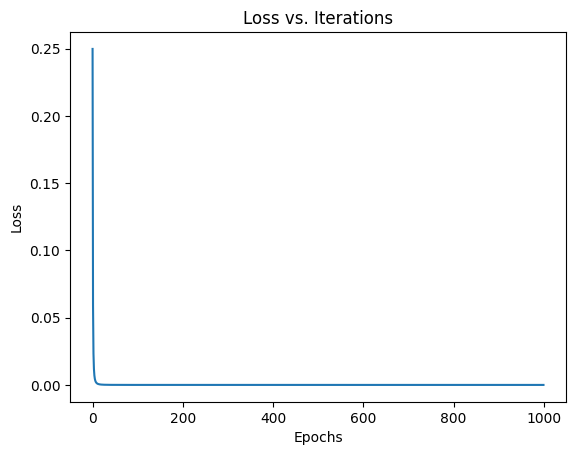

Accuracy: 1.0
Sensitivity (Recall): 1.0
Specificity: 0
Precision: 1.0
Recall: 1.0
F-Measure: 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset: 7-segment binary representation of digits 0 to 9
inputs = np.array([
    [1, 1, 1, 1, 1, 1, 0],  # 0
    [0, 1, 1, 0, 0, 0, 0],  # 1
    [1, 1, 0, 1, 1, 0, 1],  # 2
    [1, 1, 1, 1, 0, 0, 1],  # 3
    [0, 1, 1, 0, 0, 1, 1],  # 4
    [1, 0, 1, 1, 0, 1, 1],  # 5
    [1, 0, 1, 1, 1, 1, 1],  # 6
    [1, 1, 1, 0, 0, 0, 0],  # 7
    [1, 1, 1, 1, 1, 1, 1],  # 8
    [1, 1, 1, 1, 0, 1, 1]   # 9
])

# Target outputs (1 for digits 0-9)
targets = np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])

# Hyperparameters and Network Architecture
input_size = 7
hidden_layer1_size = 10
hidden_layer2_size = 5
output_size = 1
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_layer1_size) * 0.01
b1 = np.zeros((1, hidden_layer1_size))
W2 = np.random.randn(hidden_layer1_size, hidden_layer2_size) * 0.01
b2 = np.zeros((1, hidden_layer2_size))
W3 = np.random.randn(hidden_layer2_size, output_size) * 0.01
b3 = np.zeros((1, output_size))

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Forward propagation
def forward_propagation(inputs):
    Z1 = np.dot(inputs, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Backpropagation
def backpropagation(inputs, targets, Z1, A1, Z2, A2, Z3, A3):
    global W1, b1, W2, b2, W3, b3
    
    # Output layer error
    dZ3 = A3 - targets
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)
    
    # Layer 2 error
    dZ2 = np.dot(dZ3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    # Layer 1 error
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(inputs.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

# Training the network
losses = []
for epoch in range(epochs):
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation(inputs)
    loss = mse_loss(targets, A3)
    losses.append(loss)
    backpropagation(inputs, targets, Z1, A1, Z2, A2, Z3, A3)
    if epoch % 1 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


#For each iteration save W1, W2, W3, b1, b2, b3, Output layer error, Layer 2 error, Layer 1 error, Loss, updated W1, W2, W3, b1, b2, b3 as header in a csv file
import csv
with open('output.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['W1', 'W2', 'W3', 'b1', 'b2', 'b3', 'Output layer error', 'Layer 2 error', 'Layer 1 error', 'Loss', 'Updated W1', 'Updated W2', 'Updated W3', 'Updated b1', 'Updated b2', 'Updated b3'])
    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_propagation(inputs)
        loss = mse_loss(targets, A3)
        writer.writerow([W1, W2, W3, b1, b2, b3, A3, Z3, Z2, loss, W1, W2, W3, b1, b2, b3])
        backpropagation(inputs, targets, Z1, A1, Z2, A2, Z3, A3)
        if epoch % 1 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

        
# Save the final weights and biases as csv
with open('weights.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['W1', 'W2', 'W3', 'b1', 'b2', 'b3'])
    writer.writerow([W1, W2, W3, b1, b2, b3])

# Save the final loss as csv
with open('loss.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Loss'])
    writer.writerow([loss])

# Save the final predictions as csv
with open('predictions.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Predictions'])
    writer.writerow([A3])
    



# Plot Loss vs. Iterations
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

# Evaluation Metrics
predictions = A3 >= 0.9  # Convert probabilities to binary 0/1 predictions

# Calculate TP, FP, TN, FN
TP = np.sum((predictions == 1) & (targets == 1))
FP = np.sum((predictions == 1) & (targets == 0))
TN = np.sum((predictions == 0) & (targets == 0))
FN = np.sum((predictions == 0) & (targets == 1))

# Metrics calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = sensitivity
f_measure = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
